In [109]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression

In [110]:
df_list = pd.read_excel('test.xlsx', sheet_name='Лист1', dtype={'SKU_prognoz': str, 'Values': int, '2018': float, '2019': float, '2020': float},header=3) 
df_list

,SKU_prognoz,Values,2018,2019,2020
0,"Atto Primo Asti 0,75",1,495.166667,2151.583333,2250.416667
1,"Atto Primo Asti 0,75",2,725.750000,NaN,1443.166667
2,"Atto Primo Asti 0,75",3,1491.250000,NaN,2122.916667
3,"Atto Primo Asti 0,75",4,1189.916667,NaN,1206.916667
4,"Atto Primo Asti 0,75",5,1287.333333,NaN,1699.000000
...,...,...,...,...,...
451,"ЯМСКАЯ Мягкая Бутылка 0,5 л",8,34969.000000,1072.166667,6963.611111
452,"ЯМСКАЯ Мягкая Бутылка 0,5 л",9,39446.444444,7535.000000,7380.555556
453,"ЯМСКАЯ Мягкая Бутылка 0,5 л",10,45590.388889,13644.111111,7660.833333
454,"ЯМСКАЯ Мягкая Бутылка 0,5 л",11,45357.055556,10926.388889,7040.722222


# Удаление всплесков и падений


In [111]:
test = df_list.groupby('SKU_prognoz')

In [112]:
dfs = [group.apply(lambda x: x) for name, group in test]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b3be04ed0>,
      dtype=object)

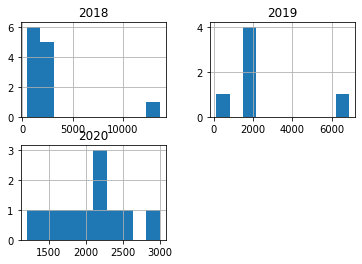

In [113]:
dfs[0].iloc[:, 2:].hist()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


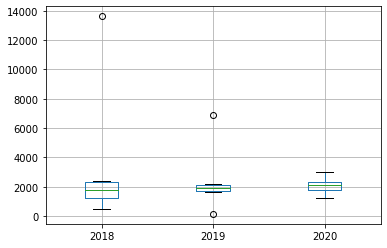

In [114]:
dfs[0].boxplot(column=[2018, 2019, 2020])

In [115]:
([group.apply(lambda x: x) for name, group in test])[2]

,SKU_prognoz,Values,2018,2019,2020
24,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",1,NaN,NaN,NaN
25,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",2,NaN,NaN,NaN
26,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",3,NaN,NaN,NaN
27,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",4,NaN,NaN,946.722222
28,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",5,NaN,NaN,6614.333333
29,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",6,NaN,NaN,9292.944444
30,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",7,NaN,NaN,9554.333333
31,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",8,NaN,NaN,9960.444444
32,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",9,NaN,NaN,9487.166667
33,"BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л",10,NaN,NaN,9294.388889


In [116]:
for i, item in enumerate(dfs):
  for year in [2018, 2019, 2020]:
    Q1 =  dfs[i][year].quantile(0.25)
    Q3 = dfs[i][year].quantile(0.75)
    IQR = Q3 - Q1
    # if i == 0:
    #   print(~((dfs[i][year] < Q1-1.5*IQR ) | (dfs[i][year] > Q3+1.5*IQR)))
    dfs[i][year] = dfs[i][year][~((dfs[i][year] < Q1-1.5*IQR ) | (dfs[i][year] > Q3+1.5*IQR))]

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
Name: 2018, dtype: bool
0      True
1      True
2      True
3      True
4      True
5      True
6      True
7     False
8      True
9      True
10     True
11    False
Name: 2019, dtype: bool
0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
Name: 2020, dtype: bool


In [117]:
dfs[1]

,SKU_prognoz,Values,2018,2019,2020
12,"Atto Primo Prosecco Dry 0,75",1,716.166667,2353.500000,2019.083333
13,"Atto Primo Prosecco Dry 0,75",2,593.750000,NaN,1382.083333
14,"Atto Primo Prosecco Dry 0,75",3,1163.333333,NaN,2064.333333
15,"Atto Primo Prosecco Dry 0,75",4,1038.833333,NaN,1847.000000
16,"Atto Primo Prosecco Dry 0,75",5,1146.250000,NaN,2701.416667
17,"Atto Primo Prosecco Dry 0,75",6,1257.083333,NaN,2234.916667
18,"Atto Primo Prosecco Dry 0,75",7,1961.666667,NaN,2800.500000
19,"Atto Primo Prosecco Dry 0,75",8,1797.166667,NaN,2623.500000
20,"Atto Primo Prosecco Dry 0,75",9,1943.500000,1412.000000,2417.250000
21,"Atto Primo Prosecco Dry 0,75",10,2254.083333,1515.500000,2398.083333


# Заполнение NaN


In [118]:
for i, _ in enumerate(dfs):
    dfs[i] = dfs[i].fillna(dfs[i].mean())

In [119]:
df = pd.concat(dfs) # 2:7

In [120]:
df = df.fillna(df.mean())

In [121]:
# df_list = df_list.apply(lambda x: x.fillna(value=df_list['mean']))
# df_list

# разбитие категориальных данных

In [122]:
# разбитие категориальных данных
df = pd.get_dummies(df, columns=["Values"])
df = pd.get_dummies(df, columns=["SKU_prognoz"])
df

,2018,2019,2020,Values_1,Values_2,Values_3,Values_4,Values_5,Values_6,Values_7,Values_8,Values_9,Values_10,Values_11,Values_12,"SKU_prognoz_Atto Primo Asti 0,75","SKU_prognoz_Atto Primo Prosecco Dry 0,75","SKU_prognoz_BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л","SKU_prognoz_CT Casillero del Diablo Red Blend 0,75",SKU_prognoz_CT Frontera Carmenere 0.75,SKU_prognoz_CT Frontera Chardonnay 0.75,SKU_prognoz_Remy Martin 1738 Accord Royal,"SKU_prognoz_Водка ""Зеленая марка"" Кедровая 0,100 литра фляжка","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,25 л. ""Кепка""","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,5 л. ""Кепка""","SKU_prognoz_Коктейль Аморе Мохито 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Пина Колада 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Шампанское-Клубника 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Грейпфрут 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Тоник 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Сани Бриз Лимон, Лайм, Мята, Имбирь 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Малина, Черная смородина, Асаи 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Манго, Ананас, Личи 0,33л 7% (12)","SKU_prognoz_Куантро 0,7л","SKU_prognoz_Метакса 5* 0,5л","SKU_prognoz_Настойка Голубой Топаз 0,1 38 %","SKU_prognoz_Настойка Голубой Топаз 0,25 38 %","SKU_prognoz_Настойка Голубой Топаз 0,5 38 %",SKU_prognoz_РУССКИЙ СТАНДАРТ 0.375л,SKU_prognoz_РУССКИЙ СТАНДАРТ 0.7л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.0л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.75л,SKU_prognoz_Реми Мартан VS 0.5л,SKU_prognoz_Реми Мартан VSOP 0.7л ПУ,SKU_prognoz_Реми Мартан ХО 0.7л ПУ,"SKU_prognoz_Сан-Реми Аутентик ХО 0,5л","SKU_prognoz_ТАЛКА 0,25л","SKU_prognoz_ТАЛКА 0,5л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,1 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,25 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,5 л","SKU_prognoz_Ягермайстер 0,2",SKU_prognoz_Ягермайстер 0.7л
0,495.166667,2151.583333,2250.416667,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,725.750000,1900.062500,1443.166667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1491.250000,1900.062500,2122.916667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1189.916667,1900.062500,1206.916667,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1287.333333,1900.062500,1699.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1744.866667,2196.600000,4906.222222,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,1923.288889,2692.200000,4856.677778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
417,1983.411111,3305.322222,5486.366667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
418,2140.133333,3809.244444,4833.188889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [161]:
df = df.rename({2018: '2018_year', 2019: '2019_year', 2020: '2020_year'}, axis=1)
df

,2018_year,2019_year,2020_year,Values_1,Values_2,Values_3,Values_4,Values_5,Values_6,Values_7,Values_8,Values_9,Values_10,Values_11,Values_12,"SKU_prognoz_Atto Primo Asti 0,75","SKU_prognoz_Atto Primo Prosecco Dry 0,75","SKU_prognoz_BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л","SKU_prognoz_CT Casillero del Diablo Red Blend 0,75",SKU_prognoz_CT Frontera Carmenere 0.75,SKU_prognoz_CT Frontera Chardonnay 0.75,SKU_prognoz_Remy Martin 1738 Accord Royal,"SKU_prognoz_Водка ""Зеленая марка"" Кедровая 0,100 литра фляжка","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,25 л. ""Кепка""","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,5 л. ""Кепка""","SKU_prognoz_Коктейль Аморе Мохито 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Пина Колада 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Шампанское-Клубника 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Грейпфрут 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Тоник 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Сани Бриз Лимон, Лайм, Мята, Имбирь 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Малина, Черная смородина, Асаи 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Манго, Ананас, Личи 0,33л 7% (12)","SKU_prognoz_Куантро 0,7л","SKU_prognoz_Метакса 5* 0,5л","SKU_prognoz_Настойка Голубой Топаз 0,1 38 %","SKU_prognoz_Настойка Голубой Топаз 0,25 38 %","SKU_prognoz_Настойка Голубой Топаз 0,5 38 %",SKU_prognoz_РУССКИЙ СТАНДАРТ 0.375л,SKU_prognoz_РУССКИЙ СТАНДАРТ 0.7л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.0л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.75л,SKU_prognoz_Реми Мартан VS 0.5л,SKU_prognoz_Реми Мартан VSOP 0.7л ПУ,SKU_prognoz_Реми Мартан ХО 0.7л ПУ,"SKU_prognoz_Сан-Реми Аутентик ХО 0,5л","SKU_prognoz_ТАЛКА 0,25л","SKU_prognoz_ТАЛКА 0,5л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,1 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,25 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,5 л","SKU_prognoz_Ягермайстер 0,2",SKU_prognoz_Ягермайстер 0.7л
0,495.166667,2151.583333,2250.416667,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,725.750000,1900.062500,1443.166667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1491.250000,1900.062500,2122.916667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1189.916667,1900.062500,1206.916667,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1287.333333,1900.062500,1699.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1744.866667,2196.600000,4906.222222,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,1923.288889,2692.200000,4856.677778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
417,1983.411111,3305.322222,5486.366667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
418,2140.133333,3809.244444,4833.188889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# baseline

In [166]:
df_first = (df.drop('2020_year', axis=1)).rename({'2018_year': 'present', '2019_year': 'next'}, axis=1)
df_second = (df.drop('2018_year', axis=1)).rename({'2019_year': 'present', '2020_year': 'next'}, axis=1)
df_second

,present,next,Values_1,Values_2,Values_3,Values_4,Values_5,Values_6,Values_7,Values_8,Values_9,Values_10,Values_11,Values_12,"SKU_prognoz_Atto Primo Asti 0,75","SKU_prognoz_Atto Primo Prosecco Dry 0,75","SKU_prognoz_BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л","SKU_prognoz_CT Casillero del Diablo Red Blend 0,75",SKU_prognoz_CT Frontera Carmenere 0.75,SKU_prognoz_CT Frontera Chardonnay 0.75,SKU_prognoz_Remy Martin 1738 Accord Royal,"SKU_prognoz_Водка ""Зеленая марка"" Кедровая 0,100 литра фляжка","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,25 л. ""Кепка""","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,5 л. ""Кепка""","SKU_prognoz_Коктейль Аморе Мохито 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Пина Колада 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Шампанское-Клубника 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Грейпфрут 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Тоник 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Сани Бриз Лимон, Лайм, Мята, Имбирь 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Малина, Черная смородина, Асаи 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Манго, Ананас, Личи 0,33л 7% (12)","SKU_prognoz_Куантро 0,7л","SKU_prognoz_Метакса 5* 0,5л","SKU_prognoz_Настойка Голубой Топаз 0,1 38 %","SKU_prognoz_Настойка Голубой Топаз 0,25 38 %","SKU_prognoz_Настойка Голубой Топаз 0,5 38 %",SKU_prognoz_РУССКИЙ СТАНДАРТ 0.375л,SKU_prognoz_РУССКИЙ СТАНДАРТ 0.7л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.0л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.75л,SKU_prognoz_Реми Мартан VS 0.5л,SKU_prognoz_Реми Мартан VSOP 0.7л ПУ,SKU_prognoz_Реми Мартан ХО 0.7л ПУ,"SKU_prognoz_Сан-Реми Аутентик ХО 0,5л","SKU_prognoz_ТАЛКА 0,25л","SKU_prognoz_ТАЛКА 0,5л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,1 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,25 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,5 л","SKU_prognoz_Ягермайстер 0,2",SKU_prognoz_Ягермайстер 0.7л
0,2151.583333,2250.416667,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1900.062500,1443.166667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1900.062500,2122.916667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1900.062500,1206.916667,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1900.062500,1699.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2196.600000,4906.222222,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,2692.200000,4856.677778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
417,3305.322222,5486.366667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
418,3809.244444,4833.188889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [167]:
df_baseline = pd.concat([df_first, df_second])
df_baseline

,present,next,Values_1,Values_2,Values_3,Values_4,Values_5,Values_6,Values_7,Values_8,Values_9,Values_10,Values_11,Values_12,"SKU_prognoz_Atto Primo Asti 0,75","SKU_prognoz_Atto Primo Prosecco Dry 0,75","SKU_prognoz_BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л","SKU_prognoz_CT Casillero del Diablo Red Blend 0,75",SKU_prognoz_CT Frontera Carmenere 0.75,SKU_prognoz_CT Frontera Chardonnay 0.75,SKU_prognoz_Remy Martin 1738 Accord Royal,"SKU_prognoz_Водка ""Зеленая марка"" Кедровая 0,100 литра фляжка","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,25 л. ""Кепка""","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,5 л. ""Кепка""","SKU_prognoz_Коктейль Аморе Мохито 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Пина Колада 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Шампанское-Клубника 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Грейпфрут 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Тоник 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Сани Бриз Лимон, Лайм, Мята, Имбирь 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Малина, Черная смородина, Асаи 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Манго, Ананас, Личи 0,33л 7% (12)","SKU_prognoz_Куантро 0,7л","SKU_prognoz_Метакса 5* 0,5л","SKU_prognoz_Настойка Голубой Топаз 0,1 38 %","SKU_prognoz_Настойка Голубой Топаз 0,25 38 %","SKU_prognoz_Настойка Голубой Топаз 0,5 38 %",SKU_prognoz_РУССКИЙ СТАНДАРТ 0.375л,SKU_prognoz_РУССКИЙ СТАНДАРТ 0.7л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.0л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.75л,SKU_prognoz_Реми Мартан VS 0.5л,SKU_prognoz_Реми Мартан VSOP 0.7л ПУ,SKU_prognoz_Реми Мартан ХО 0.7л ПУ,"SKU_prognoz_Сан-Реми Аутентик ХО 0,5л","SKU_prognoz_ТАЛКА 0,25л","SKU_prognoz_ТАЛКА 0,5л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,1 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,25 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,5 л","SKU_prognoz_Ягермайстер 0,2",SKU_prognoz_Ягермайстер 0.7л
0,495.166667,2151.583333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,725.750000,1900.062500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1491.250000,1900.062500,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1189.916667,1900.062500,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1287.333333,1900.062500,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2196.600000,4906.222222,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
416,2692.200000,4856.677778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
417,3305.322222,5486.366667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
418,3809.244444,4833.188889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [168]:
reg = LinearRegression().fit(df_baseline.drop('next', axis=1), df_baseline['next'])

In [174]:
X = df.drop(['2018_year', '2019_year'], axis=1).rename({'2020_year': 'present'}, axis=1)

In [180]:
df['2021_year'] = reg.predict(X)
df

,2018_year,2019_year,2020_year,Values_1,Values_2,Values_3,Values_4,Values_5,Values_6,Values_7,Values_8,Values_9,Values_10,Values_11,Values_12,"SKU_prognoz_Atto Primo Asti 0,75","SKU_prognoz_Atto Primo Prosecco Dry 0,75","SKU_prognoz_BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л","SKU_prognoz_CT Casillero del Diablo Red Blend 0,75",SKU_prognoz_CT Frontera Carmenere 0.75,SKU_prognoz_CT Frontera Chardonnay 0.75,SKU_prognoz_Remy Martin 1738 Accord Royal,"SKU_prognoz_Водка ""Зеленая марка"" Кедровая 0,100 литра фляжка","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,25 л. ""Кепка""","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,5 л. ""Кепка""","SKU_prognoz_Коктейль Аморе Мохито 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Пина Колада 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Шампанское-Клубника 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Грейпфрут 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Тоник 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Сани Бриз Лимон, Лайм, Мята, Имбирь 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Малина, Черная смородина, Асаи 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Манго, Ананас, Личи 0,33л 7% (12)","SKU_prognoz_Куантро 0,7л","SKU_prognoz_Метакса 5* 0,5л","SKU_prognoz_Настойка Голубой Топаз 0,1 38 %","SKU_prognoz_Настойка Голубой Топаз 0,25 38 %","SKU_prognoz_Настойка Голубой Топаз 0,5 38 %",SKU_prognoz_РУССКИЙ СТАНДАРТ 0.375л,SKU_prognoz_РУССКИЙ СТАНДАРТ 0.7л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.0л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.75л,SKU_prognoz_Реми Мартан VS 0.5л,SKU_prognoz_Реми Мартан VSOP 0.7л ПУ,SKU_prognoz_Реми Мартан ХО 0.7л ПУ,"SKU_prognoz_Сан-Реми Аутентик ХО 0,5л","SKU_prognoz_ТАЛКА 0,25л","SKU_prognoz_ТАЛКА 0,5л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,1 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,25 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,5 л","SKU_prognoz_Ягермайстер 0,2",SKU_prognoz_Ягермайстер 0.7л,2021_year
0,495.166667,2151.583333,2250.416667,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2155.613559
1,725.750000,1900.062500,1443.166667,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1859.199183
2,1491.250000,1900.062500,2122.916667,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2475.612029
3,1189.916667,1900.062500,1206.916667,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1820.528093
4,1287.333333,1900.062500,1699.000000,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1471.172976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1744.866667,2196.600000,4906.222222,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3318.118146
416,1923.288889,2692.200000,4856.677778,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3292.816071
417,1983.411111,3305.322222,5486.366667,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4013.996762
418,2140.133333,3809.244444,4833.188889,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3777.585851


In [207]:
reg.predict(X)

array([ 2.15561356e+03,  1.85919918e+03,  2.47561203e+03,  1.82052809e+03,
        1.47117298e+03,  1.68408308e+03,  2.05970308e+03,  1.72270598e+03,
        1.69542608e+03,  2.41786270e+03,  2.18107453e+03,  2.36016593e+03,
        2.15149901e+03,  1.85423029e+03,  2.47063059e+03,  1.81204059e+03,
        1.46086720e+03,  1.67708180e+03,  2.05054021e+03,  1.71568672e+03,
        1.69117103e+03,  2.41560782e+03,  2.17913956e+03,  2.35430352e+03,
        7.04069182e+03,  6.74022648e+03,  7.36005047e+03,  6.70036984e+03,
        6.36538820e+03,  6.56581994e+03,  6.94080486e+03,  6.60302519e+03,
        6.57984950e+03,  7.30515752e+03,  7.06844183e+03,  7.24442451e+03,
        2.83452868e+03,  2.53406334e+03,  3.15388733e+03,  2.49420670e+03,
        2.14732096e+03,  2.36119457e+03,  2.73749119e+03,  2.40234906e+03,
        2.37607782e+03,  3.10008598e+03,  2.86082549e+03,  3.03826137e+03,
        3.17848945e+03,  2.87802412e+03,  3.49784810e+03,  2.83816747e+03,
        2.49128174e+03,  

# Ретро прогноз

In [199]:
X_pred = df.drop(['2020_year', '2019_year'], axis=1).rename({'2018_year':'train'}, axis=1)
y_pred = df['2019_year'].rename('predict', axis=1)

In [206]:
X_pred

,train,Values_1,Values_2,Values_3,Values_4,Values_5,Values_6,Values_7,Values_8,Values_9,Values_10,Values_11,Values_12,"SKU_prognoz_Atto Primo Asti 0,75","SKU_prognoz_Atto Primo Prosecco Dry 0,75","SKU_prognoz_BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л","SKU_prognoz_CT Casillero del Diablo Red Blend 0,75",SKU_prognoz_CT Frontera Carmenere 0.75,SKU_prognoz_CT Frontera Chardonnay 0.75,SKU_prognoz_Remy Martin 1738 Accord Royal,"SKU_prognoz_Водка ""Зеленая марка"" Кедровая 0,100 литра фляжка","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,25 л. ""Кепка""","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,5 л. ""Кепка""","SKU_prognoz_Коктейль Аморе Мохито 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Пина Колада 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Шампанское-Клубника 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Грейпфрут 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Тоник 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Сани Бриз Лимон, Лайм, Мята, Имбирь 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Малина, Черная смородина, Асаи 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Манго, Ананас, Личи 0,33л 7% (12)","SKU_prognoz_Куантро 0,7л","SKU_prognoz_Метакса 5* 0,5л","SKU_prognoz_Настойка Голубой Топаз 0,1 38 %","SKU_prognoz_Настойка Голубой Топаз 0,25 38 %","SKU_prognoz_Настойка Голубой Топаз 0,5 38 %",SKU_prognoz_РУССКИЙ СТАНДАРТ 0.375л,SKU_prognoz_РУССКИЙ СТАНДАРТ 0.7л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.0л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.75л,SKU_prognoz_Реми Мартан VS 0.5л,SKU_prognoz_Реми Мартан VSOP 0.7л ПУ,SKU_prognoz_Реми Мартан ХО 0.7л ПУ,"SKU_prognoz_Сан-Реми Аутентик ХО 0,5л","SKU_prognoz_ТАЛКА 0,25л","SKU_prognoz_ТАЛКА 0,5л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,1 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,25 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,5 л","SKU_prognoz_Ягермайстер 0,2",SKU_prognoz_Ягермайстер 0.7л,2021_year
0,495.166667,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2155.613559
1,725.750000,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1859.199183
2,1491.250000,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2475.612029
3,1189.916667,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1820.528093
4,1287.333333,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1471.172976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,1744.866667,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3318.118146
416,1923.288889,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3292.816071
417,1983.411111,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4013.996762
418,2140.133333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3777.585851


In [202]:
pred_2020 = LinearRegression().fit(X_pred, y_pred)

In [203]:
X_score = df.drop(['2020_year', '2018_year'], axis=1).rename({'2019_year':'train'}, axis=1)
y_score = df['2020_year'].rename('predict', axis=1)

In [204]:
X_score

,train,Values_1,Values_2,Values_3,Values_4,Values_5,Values_6,Values_7,Values_8,Values_9,Values_10,Values_11,Values_12,"SKU_prognoz_Atto Primo Asti 0,75","SKU_prognoz_Atto Primo Prosecco Dry 0,75","SKU_prognoz_BRAVO CLASSIC Джин-тоник ПЭТ 0,5 л","SKU_prognoz_CT Casillero del Diablo Red Blend 0,75",SKU_prognoz_CT Frontera Carmenere 0.75,SKU_prognoz_CT Frontera Chardonnay 0.75,SKU_prognoz_Remy Martin 1738 Accord Royal,"SKU_prognoz_Водка ""Зеленая марка"" Кедровая 0,100 литра фляжка","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,25 л. ""Кепка""","SKU_prognoz_ЗЕЛЕНАЯ МАРКА Кедровая Бутылка 0,5 л. ""Кепка""","SKU_prognoz_Коктейль Аморе Мохито 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Пина Колада 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Аморе Шампанское-Клубника 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Грейпфрут 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Браво Джин-Тоник 0,45л 7,1% банка (12)","SKU_prognoz_Коктейль Сани Бриз Лимон, Лайм, Мята, Имбирь 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Малина, Черная смородина, Асаи 0,33л 7% (12)","SKU_prognoz_Коктейль Сани Бриз Манго, Ананас, Личи 0,33л 7% (12)","SKU_prognoz_Куантро 0,7л","SKU_prognoz_Метакса 5* 0,5л","SKU_prognoz_Настойка Голубой Топаз 0,1 38 %","SKU_prognoz_Настойка Голубой Топаз 0,25 38 %","SKU_prognoz_Настойка Голубой Топаз 0,5 38 %",SKU_prognoz_РУССКИЙ СТАНДАРТ 0.375л,SKU_prognoz_РУССКИЙ СТАНДАРТ 0.7л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.0л,SKU_prognoz_РУССКИЙ СТАНДАРТ 1.75л,SKU_prognoz_Реми Мартан VS 0.5л,SKU_prognoz_Реми Мартан VSOP 0.7л ПУ,SKU_prognoz_Реми Мартан ХО 0.7л ПУ,"SKU_prognoz_Сан-Реми Аутентик ХО 0,5л","SKU_prognoz_ТАЛКА 0,25л","SKU_prognoz_ТАЛКА 0,5л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,1 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,25 л","SKU_prognoz_ЯМСКАЯ Мягкая Бутылка 0,5 л","SKU_prognoz_Ягермайстер 0,2",SKU_prognoz_Ягермайстер 0.7л,2021_year
0,2151.583333,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2155.613559
1,1900.062500,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1859.199183
2,1900.062500,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2475.612029
3,1900.062500,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1820.528093
4,1900.062500,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1471.172976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,2196.600000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3318.118146
416,2692.200000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3292.816071
417,3305.322222,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4013.996762
418,3809.244444,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3777.585851


In [205]:
pred_2020.score(X_score, y_score)

0.5693701863812044